# **Minibatch for DUTS-TR & DUTS-TE Datasets**

In [6]:
# using Pkg
# Pkg.add("Images")
# Pkg.add("FileIO")

In [9]:
using Images
img_path = "Data/DUTS/DUTS-TR/DUTS-TR-Image/ILSVRC2012_test_00000004.jpg"
img = load(img_path)

mask_path = "Data/DUTS/DUTS-TR/DUTS-TR-Mask/ILSVRC2012_test_00000004.png"
mask = load(mask_path);

In [10]:
size(mask), size(img)  # VARIABLE SIZE

((366, 400), (366, 400))

In [11]:
train_image_paths = split(read(`ls -1v Data/DUTS/DUTS-TR/DUTS-TR-Image`, String));
train_mask_paths = split(read(`ls -1v Data/DUTS/DUTS-TR/DUTS-TR-Mask`, String));

test_image_paths = split(read(`ls -1v Data/DUTS/DUTS-TE/DUTS-TE-Image`, String));
test_mask_paths = split(read(`ls -1v Data/DUTS/DUTS-TE/DUTS-TE-Mask`, String));

train_image_paths = ["Data/DUTS/DUTS-TR/DUTS-TR-Image/"*i for i in train_image_paths]
train_mask_paths = ["Data/DUTS/DUTS-TR/DUTS-TR-Mask/"*i for i in train_mask_paths]

test_image_paths = ["Data/DUTS/DUTS-TE/DUTS-TE-Image/"*i for i in test_image_paths]
test_mask_paths = ["Data/DUTS/DUTS-TE/DUTS-TE-Mask/"*i for i in test_mask_paths];

In [12]:
function minibatch(x, y, bs=16)
    data = Any[]
    n_instances = length(x)
    n_batches = n_instances / bs
    for batch = 1:4
        xbatch = Any[]
        ybatch = Any[]
        
        bs_range = batch == n_batches ?  n_instances-n_batches*bs : bs
        for sample = 1:bs_range
            push!(xbatch, imresize(load(x[bs * (batch-1) + sample]), (224, 224)));
            push!(ybatch, imresize(load(y[bs * (batch-1) + sample]), (224, 224)));
            # push!(ybatch, load(y[bs * (batch-1) + sample]));
        end
        push!(data,(xbatch,ybatch))
    end
    return data
end

minibatch (generic function with 2 methods)

In [13]:
train_dataloader = minibatch(train_image_paths, train_mask_paths);
test_dataloader = minibatch(test_image_paths, train_mask_paths);

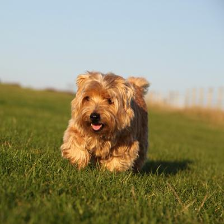

In [14]:
train_dataloader[1][1][1]

In [ ]:
train_dataloader[1][1][2]

# **Baseline CNN Model**

In [8]:
using Pkg;